<a href="https://colab.research.google.com/github/nika-va/Superstore-dataset-analysis/blob/main/superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# .
<a name = "top"></a>
<div align="center">
  <br>
  <img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/2/20/NBC_Superstore.png" width="300" >
  <h1>Dataset analysis</h1>
</div>
<br>

## What is SuperStore Dataset about?

**Context:**

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

**Metadata:**

1.   Row ID => Unique ID for each row.
2. Order ID => Unique Order ID for each Customer.
3. Order Date => Order Date of the product.
4. Ship Date => Shipping Date of the Product.
5. Ship Mode=> Shipping Mode specified by the Customer.
6. Customer ID => Unique ID to identify each Customer.
7. Customer Name => Name of the Customer.
8. Segment => The segment where the Customer belongs.
9. Country => Country of residence of the Customer.
10. City => City of residence of of the Customer.
11. State => State of residence of the Customer.
12. Postal Code => Postal Code of every Customer.
13. Region => Region where the Customer belong.
14. Product ID => Unique ID of the Product.
15. Category => Category of the product ordered.
16. Sub-Category => Sub-Category of the product ordered.
17. Product Name => Name of the Product
18. Sales => Sales of the Product.



## Table of Contents

- [Load and Check data](#1)
- [Variable Description](#2)
  *   [Numerical Columns Visualized](#2.1)
  *   [Categorical Columns Visualized](#2.2)
- [Missing Value Check](#3)
- [Outlier detection](#4)
- [Visualization in depth](#5)


## Acknowledgements

I do not own this data. I merely found it from the [Tableau](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) website. All credits to the original authors/creators. For educational purposes only.


<p align="center">
<br>
  <strong>Happy Coding</strong> ❤️
</p>



In [1197]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import zipfile as zp
sns.set_style("white")

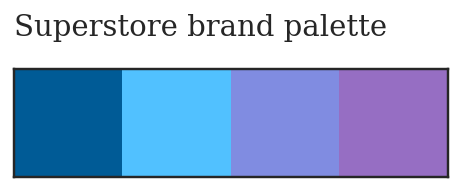

In [1198]:
colors = ['#005B96', '#51C1FF', '#808CE1', '#966EC3']
sns.palplot(colors)

plt.title("Superstore brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# 1. Load and Check dataset
<a name = "1"></a>
[⬆ Back to Top](#top)

In [1199]:
df = pd.read_csv('/content/train.csv').iloc[:-1]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#2. Variable description
<a name = "2"></a>
[⬆ Back to Top](#top)

In [1201]:
def is_unique(cols):
  for col in cols:
    print(df[col].is_unique)

cols = ['Row ID', 'Order ID', 'Product Name']
is_unique(cols)

True
False
False


In [1202]:
df.drop(['Row ID'], axis=1, inplace=True)
df.drop(['Postal Code'], axis=1, inplace=True);

In [1203]:
df['Order Date'] = [dt.datetime.strptime(x, "%d/%m/%Y") for x in df['Order Date']]
df['Ship Date'] = [dt.datetime.strptime(x, "%d/%m/%Y") for x in df['Ship Date']]

In [1204]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date'])

In [1205]:
# Check if each unique value in Order ID corresponds to only one unique value in Customer ID
df.groupby('Customer ID')['Order ID'].nunique().eq(1).all()

False

* this means some customers actually returns back to purchase

In [1206]:
df.describe()

,Sales,Shipping Delay
count,9799.000000,9799
mean,230.791550,3 days 23:03:51.819573425
std,626.679897,1 days 17:59:31.611223374
min,0.444000,0 days 00:00:00
25%,17.264000,3 days 00:00:00
50%,54.500000,4 days 00:00:00
75%,210.630000,5 days 00:00:00
max,22638.480000,7 days 00:00:00


In [1207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Order ID        9799 non-null   object         
 1   Order Date      9799 non-null   datetime64[ns] 
 2   Ship Date       9799 non-null   datetime64[ns] 
 3   Ship Mode       9799 non-null   object         
 4   Customer ID     9799 non-null   object         
 5   Customer Name   9799 non-null   object         
 6   Segment         9799 non-null   object         
 7   Country         9799 non-null   object         
 8   City            9799 non-null   object         
 9   State           9799 non-null   object         
 10  Region          9799 non-null   object         
 11  Product ID      9799 non-null   object         
 12  Category        9799 non-null   object         
 13  Sub-Category    9799 non-null   object         
 14  Product Name    9799 non-null   object  

##2.1 Numerical columns visualized
<a name = "2.1"></a>
[⬆ Back to Top](#top)

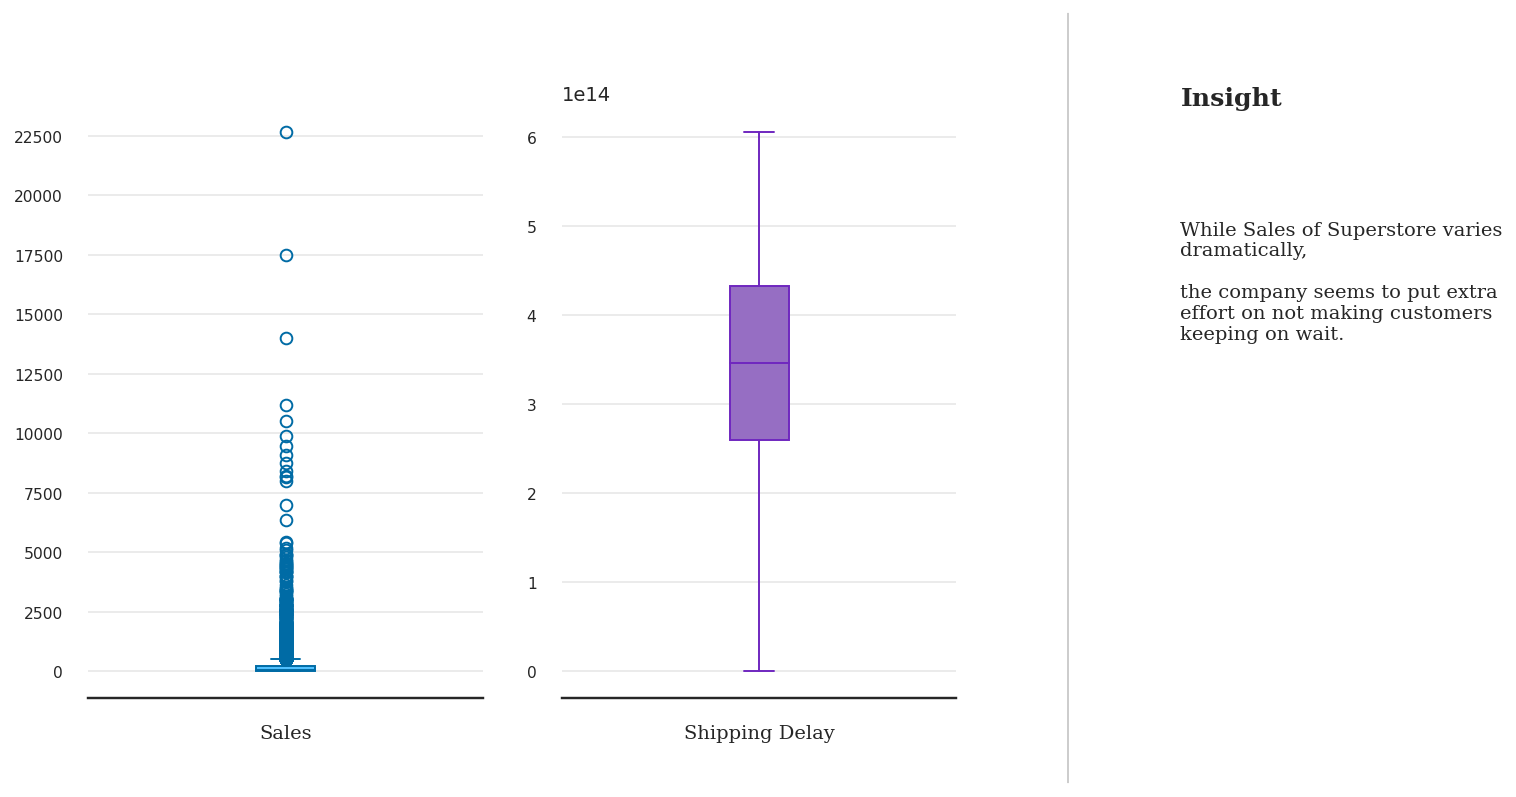

In [1208]:
fig, ax = plt.subplots(1,2)
colors = ['#51C1FF','#006BA5', "#966EC3", '#6F27BF']
# plt.figure(constrained_layout=True)

cols = ['Sales', 'Shipping Delay']
for i in range(2):
  ax[i].boxplot(pd.to_numeric(df[cols[i]]),
                patch_artist=True,
                boxprops=dict(facecolor=colors[i*2], color=colors[i*2+1]),
                capprops=dict(color=colors[i*2+1]),
                whiskerprops=dict(color=colors[i*2+1]),
                flierprops=dict(color=colors[i*2+1], markeredgecolor=colors[i*2+1]),
                medianprops=dict(color=colors[i*2+1]),)
ax[0].grid(axis='y', linestyle='-', alpha=0.4)
ax[1].grid(axis='y', linestyle='-', alpha=0.4)
ax[0].set_xticklabels(['Sales'], fontfamily='serif')
ax[1].set_xticklabels(['Shipping Delay'], fontfamily='serif')
ax[0].set_yticks(np.arange(0,23000,2500))
ax[0].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(1.1, 0.88, 'Insight', fontsize=13, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.55, '''
While Sales of Superstore varies
dramatically,

the company seems to put extra
effort on not making customers
keeping on wait.
'''
         , fontsize=10, fontweight='light', fontfamily='serif');

In [1209]:
month_order = ['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']
month_count = df['Order Date'].dt.month_name().str[:3].value_counts().reset_index().rename(columns={'index': 'month', 'Order Date': 'count'})
month_count['month'] = pd.Categorical(month_count['month'], categories=month_order, ordered=True)
month_count = month_count.sort_values('month')
month_count

,month,count
10,Jan,365
11,Feb,297
8,Mar,680
9,Apr,657
4,May,725
7,Jun,691
5,Jul,697
6,Aug,693
2,Sep,1354
3,Oct,809


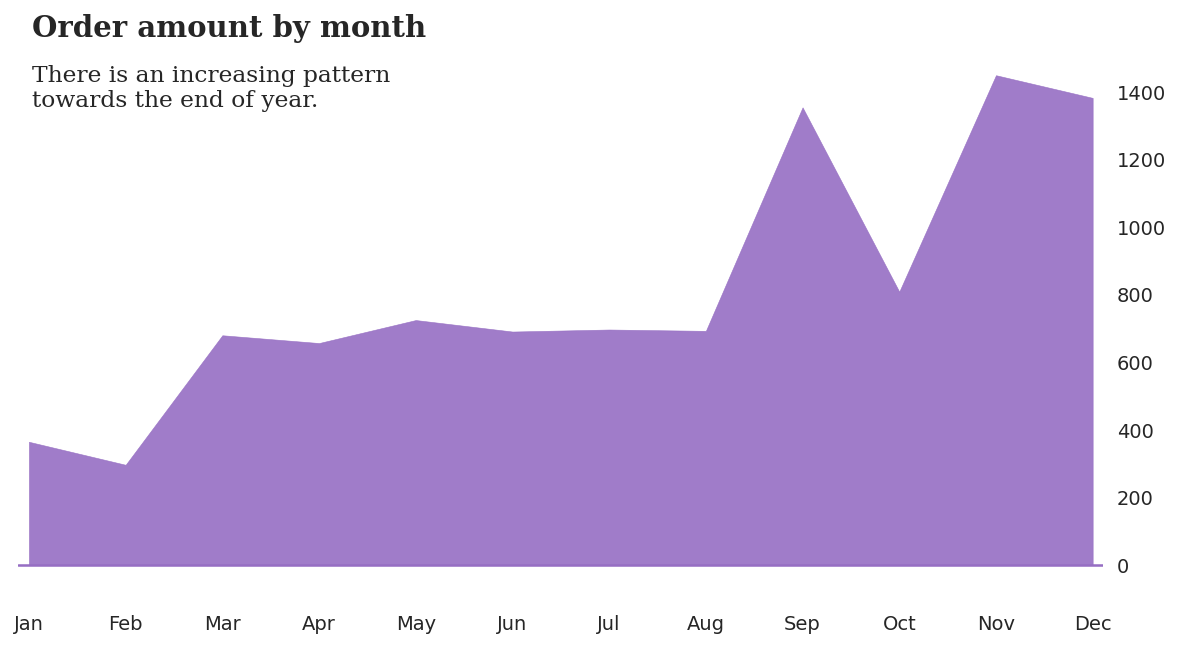

In [1210]:

fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.fill_between(month_count['month'], 0, month_count['count'], label=month_count['month'],alpha=0.9, color=colors[2])
# plt.plot(month_count['month'], month_count['count'], linewidth=3, color='#7883CC')
ax.yaxis.tick_right()
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

fig.text(0.135, 0.9, 'Order amount by month', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.135, 0.8,
"""There is an increasing pattern
towards the end of year.""", fontsize=12, fontweight='light', fontfamily='serif');
ax.axhline(y = 0, color = colors[2], linewidth = 1.3)
ax.margins(x=0.01)
ax.tick_params(axis='y', which=u'both',length=0)
plt.show()

##2.2 Categorical columns visualized
<a name = "2.2"></a>
[⬆ Back to Top](#top)

In [1211]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


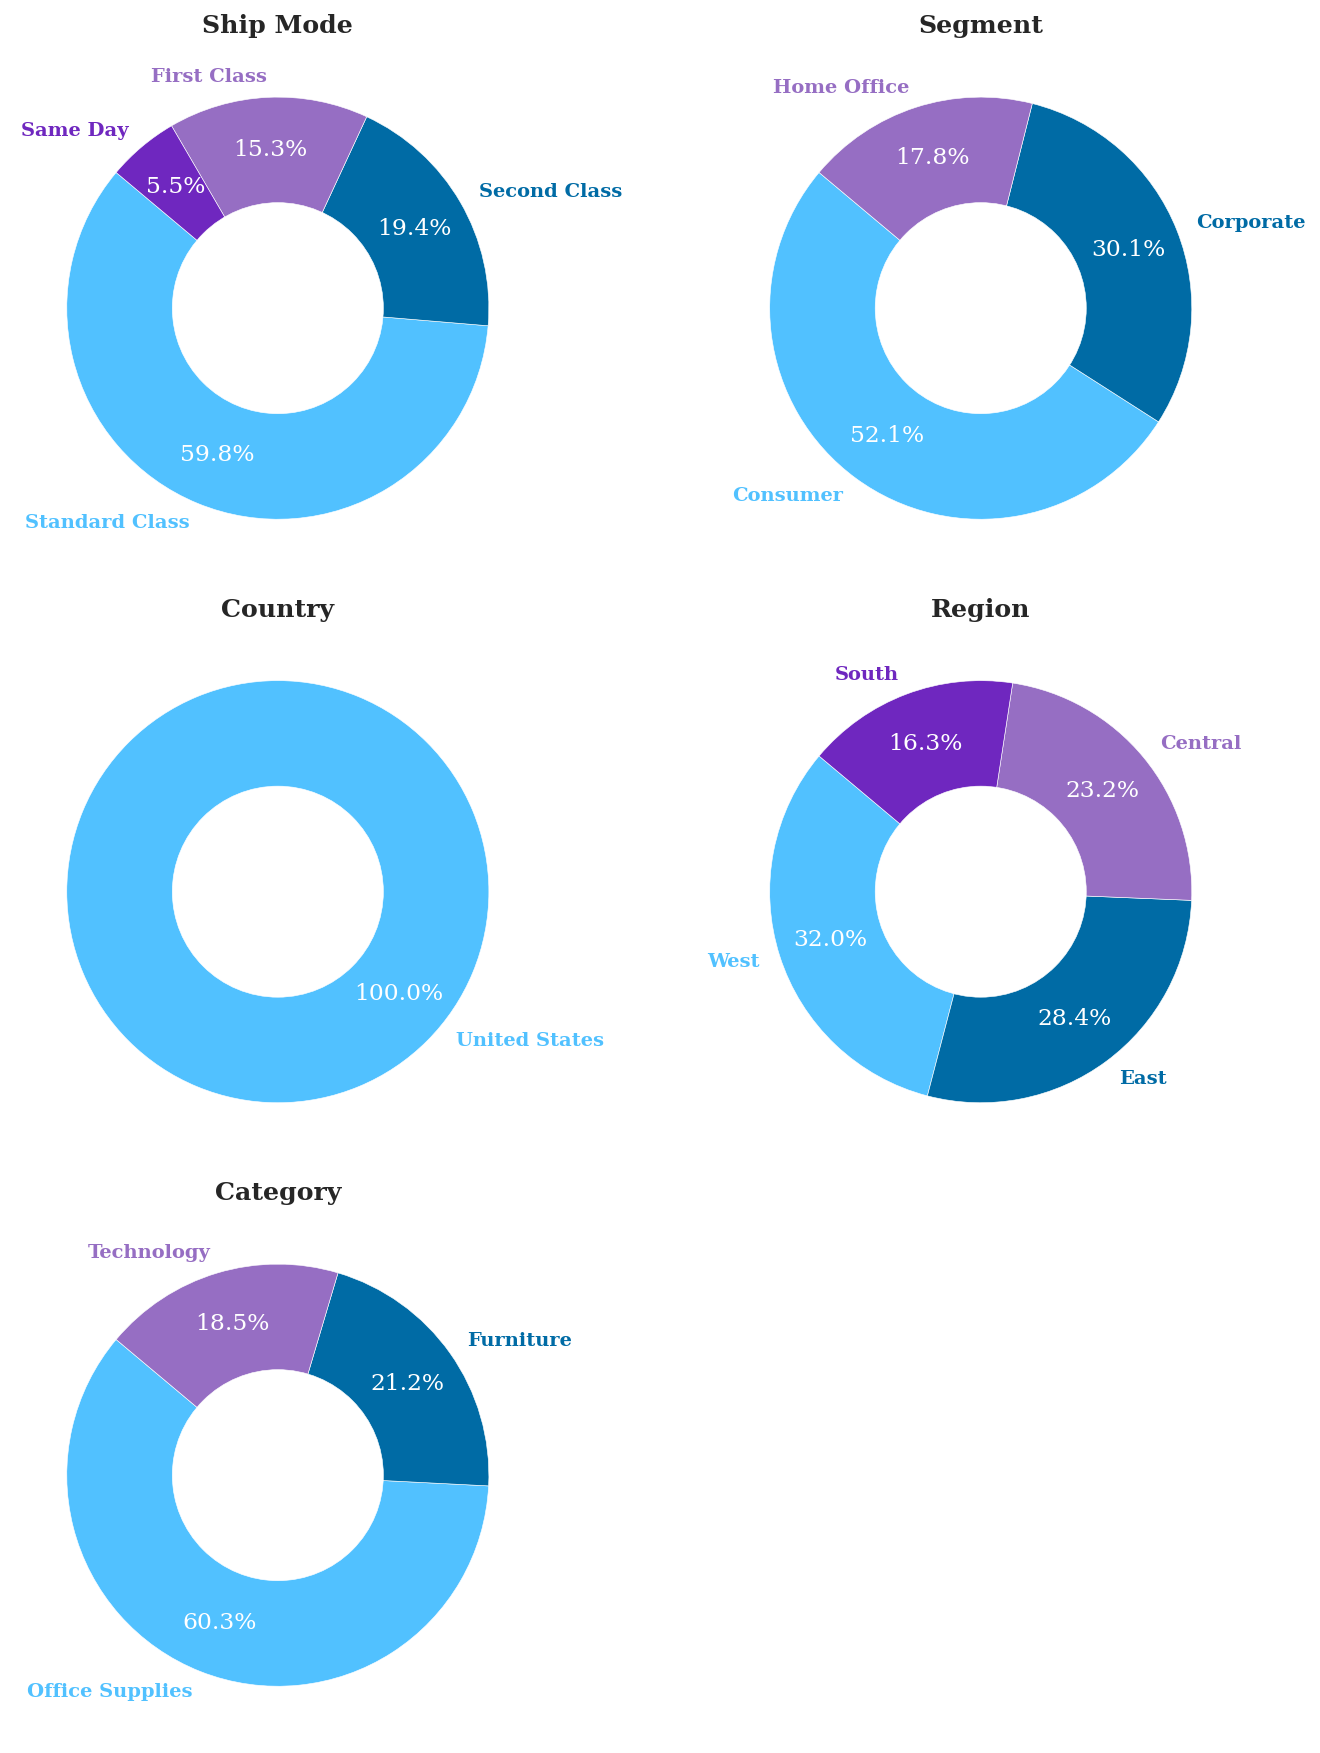

In [1212]:
import matplotlib.patches as mpatches

columns = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category']

fig, ax = plt.subplots(3, 2, figsize=(10, 13))

for idx, column in enumerate(columns):
    row = idx // 2
    col = idx % 2

    counts = df[column].value_counts()
    patches, texts, pcts = ax[row, col].pie(counts, autopct='%1.1f%%', colors=colors, startangle=140, labels=counts.index, pctdistance=0.75)
    ax[row, col].set_title(column, fontweight ="bold",fontfamily='serif', fontsize=13)
    plt.setp(pcts, color='white', fontfamily='serif')

    for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())
    plt.setp(texts, fontfamily='serif', fontweight='bold')

    center_circle = mpatches.Circle((0, 0), 0.5, color='white')
    ax[row, col].add_artist(center_circle)

plt.tight_layout()
ax[-1, -1].axis('off')

plt.show()


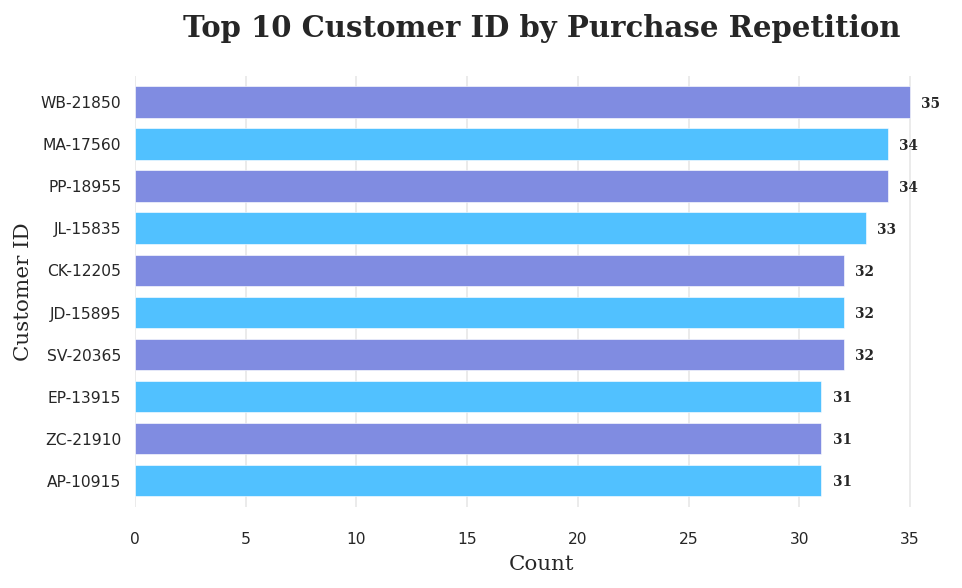

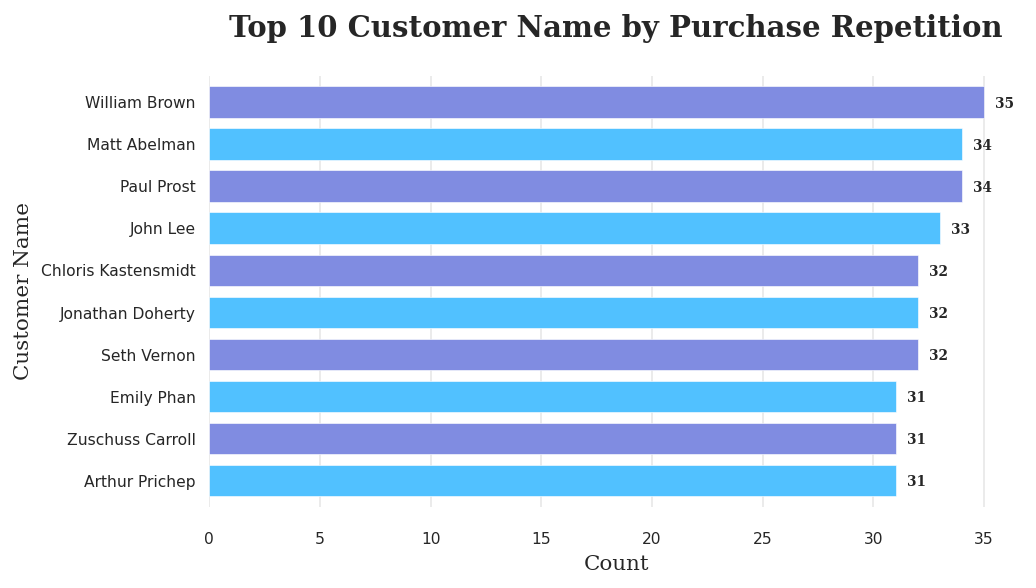

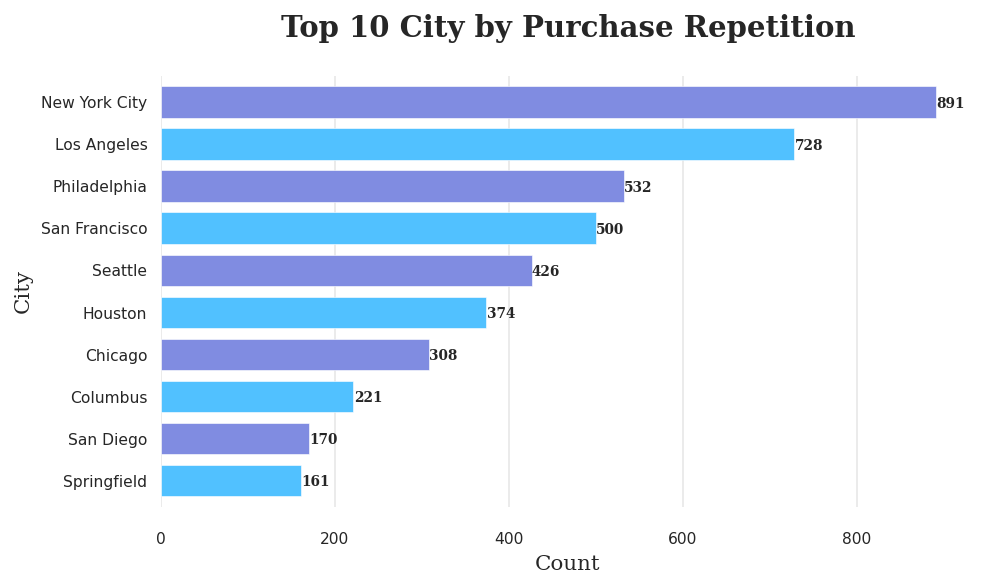

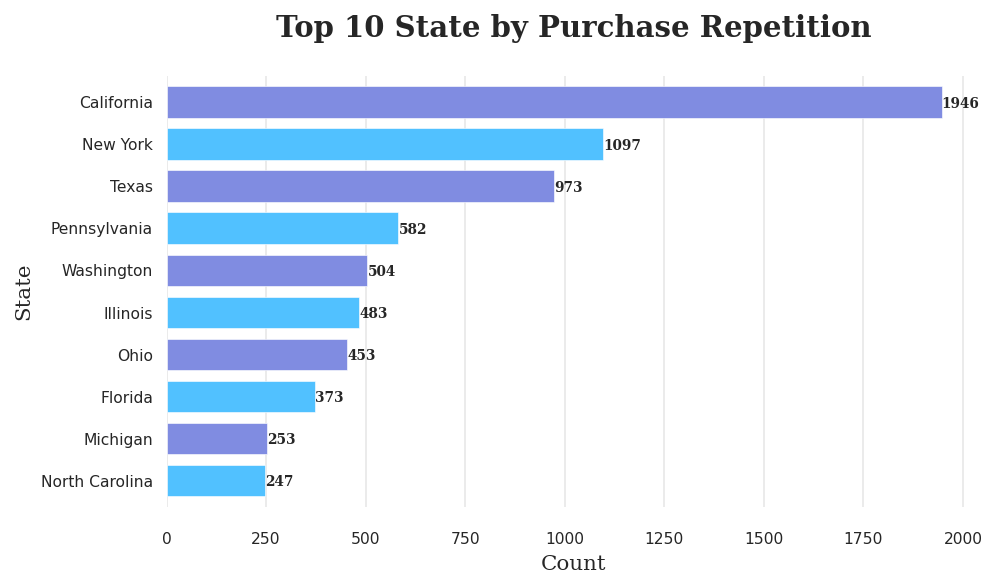

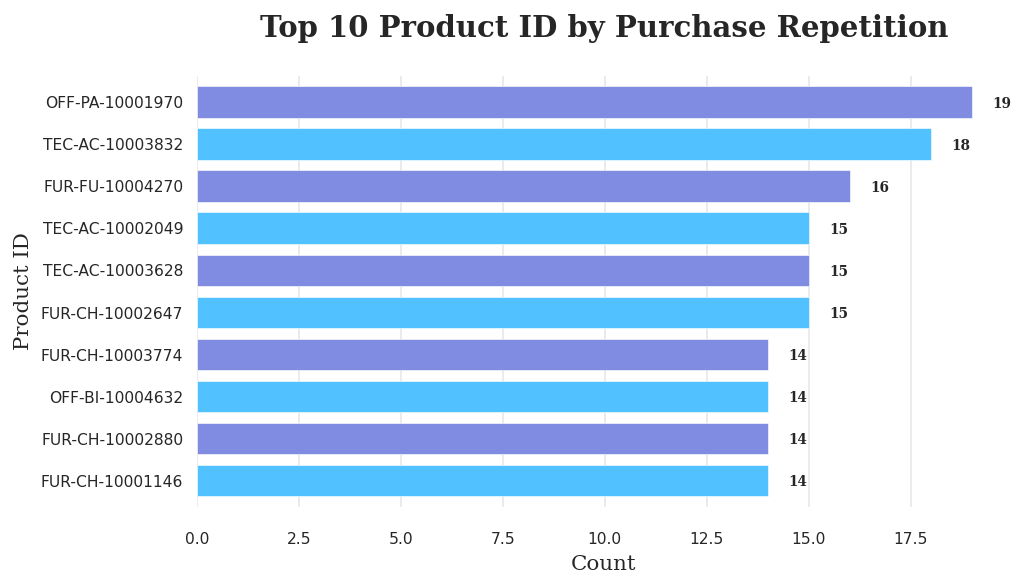

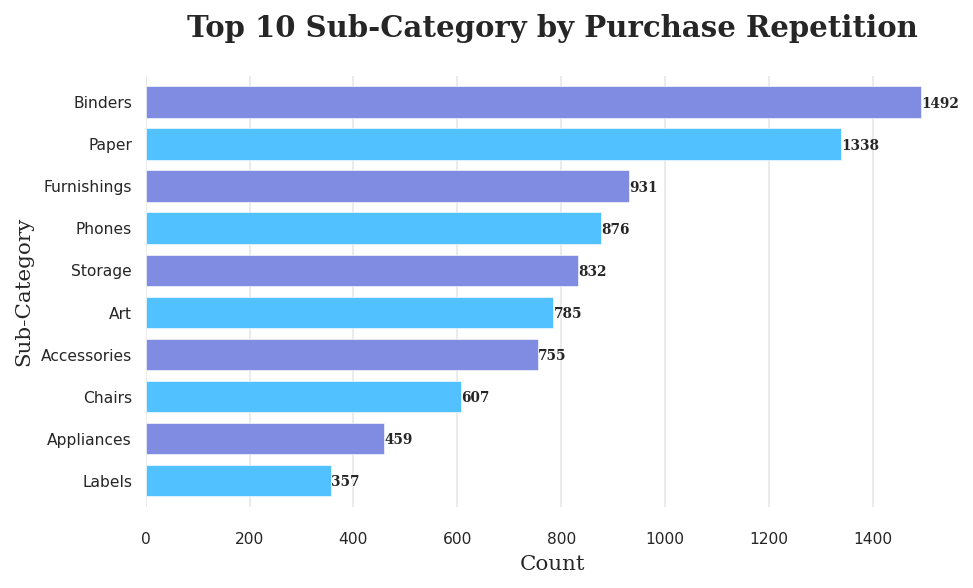

In [1213]:
cols=[ 'Customer ID', 'Customer Name', 'City', 'State', 'Product ID', 'Sub-Category']

for col in cols:
    fig, ax = plt.subplots(figsize=(7.5, 4))

    colors = [ '#51C1FF', '#808CE1']

    df[col].value_counts()[:10][::-1].plot(kind='barh', ax=ax, color=colors, width=0.75)

    for i, value in enumerate(df[col].value_counts()[:10][::-1]):
        ax.text(value+0.5, i, str(value), va='center_baseline', fontweight='bold', fontfamily='serif', fontsize=7)

    ax.set_title(f'Top 10 {col} by Purchase Repetition', fontweight="bold", fontfamily='serif', fontsize=15, pad=20)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.xaxis.grid(alpha=0.4)
    ax.set_xlabel('Count',  fontfamily='serif')
    ax.set_ylabel(f'{col}', fontfamily='serif')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    plt.show()
    print('\n'*4)



# 3. Missing Value Check
<a name = "3"></a>
[⬆ Back to Top](#top)

In [1214]:
for col in df:
  missing = df[col].isnull().sum()
  if missing:
    print(f"{col}: missing {missing}, {round(missing/len(df),2)}%")

In [1215]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Shipping Delay    0
dtype: int64

# 4. Outlier detection
<a name = "4"></a>
[⬆ Back to Top](#top)

In [1216]:
def find_outliers(columns, dataset = df):
  outliers = []
  for col in columns:
    col_series = dataset[col].sort_values()

    Q2 = col_series.median()
    mid_data = round(len(col_series)/2)
    Q1, Q3 = col_series[:mid_data].median(), col_series[mid_data:].median()
    IQR = Q3 - Q1
    data_max, data_min = Q3 + IQR *1.5, Q1 - IQR * 1.5

    for i in col_series:
      if i > data_max or i < data_min:
        outliers.append([col, i])

  return pd.pivot_table(pd.DataFrame(outliers, columns=['columns', 'outlier']), index=['columns', 'outlier'])

In [1217]:
find_outliers(['Sales', 'Shipping Delay'])

Empty DataFrame
Columns: []
Index: [(Sales, 501.81), (Sales, 502.488), (Sales, 503.96), (Sales, 504.9), (Sales, 505.176), (Sales, 505.32), (Sales, 506.28), (Sales, 508.704), (Sales, 508.768), (Sales, 509.488), (Sales, 509.9575), (Sales, 509.97), (Sales, 510.24), (Sales, 511.056), (Sales, 511.84), (Sales, 512.19), (Sales, 512.358), (Sales, 512.499), (Sales, 512.94), (Sales, 512.96), (Sales, 513.024), (Sales, 514.165), (Sales, 515.88), (Sales, 516.488), (Sales, 517.405), (Sales, 517.5), (Sales, 517.9), (Sales, 518.272), (Sales, 519.68), (Sales, 519.792), (Sales, 519.96), (Sales, 520.05), (Sales, 520.464), (Sales, 521.96), (Sales, 523.25), (Sales, 523.26), (Sales, 523.392), (Sales, 523.48), (Sales, 523.764), (Sales, 523.92), (Sales, 526.344), (Sales, 526.45), (Sales, 526.582), (Sales, 527.92), (Sales, 528.43), (Sales, 529.9), (Sales, 530.34), (Sales, 532.3992), (Sales, 532.704), (Sales, 532.72), (Sales, 533.94), (Sales, 535.41), (Sales, 537.544), (Sales, 538.194), (Sales, 538.92), (Sales, 539.658), (Sales, 539.91), (Sales, 539.92), (Sales, 539.964), (Sales, 539.97), (Sales, 540.048), (Sales, 540.57), (Sales, 541.24), (Sales, 541.44), (Sales, 542.646), (Sales, 542.94), (Sales, 543.92), (Sales, 544.008), (Sales, 544.38), (Sales, 545.85), (Sales, 545.88), (Sales, 545.916), (Sales, 545.94), (Sales, 546.06), (Sales, 546.66), (Sales, 547.136), (Sales, 547.3), (Sales, 549.98), (Sales, 549.99), (Sales, 550.431), (Sales, 551.985), (Sales, 552.0), (Sales, 552.56), (Sales, 555.21), (Sales, 555.96), (Sales, 556.665), (Sales, 557.585), (Sales, 557.728), (Sales, 558.4), (Sales, 559.62), (Sales, 559.71), (Sales, 559.92), (Sales, 559.93), (Sales, 559.984), (Sales, 559.992), (Sales, 561.568), (Sales, 561.584), (Sales, 562.2925), (Sales, 563.024), (Sales, 563.24), ...]

[926 rows x 0 columns]

# 5. Visualization in depth
<a name = "5"></a>
[⬆ Back to Top](#top)

In [1218]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


Text(0.0, 1.1, "Delay's relation with Shipping Mode chosen")

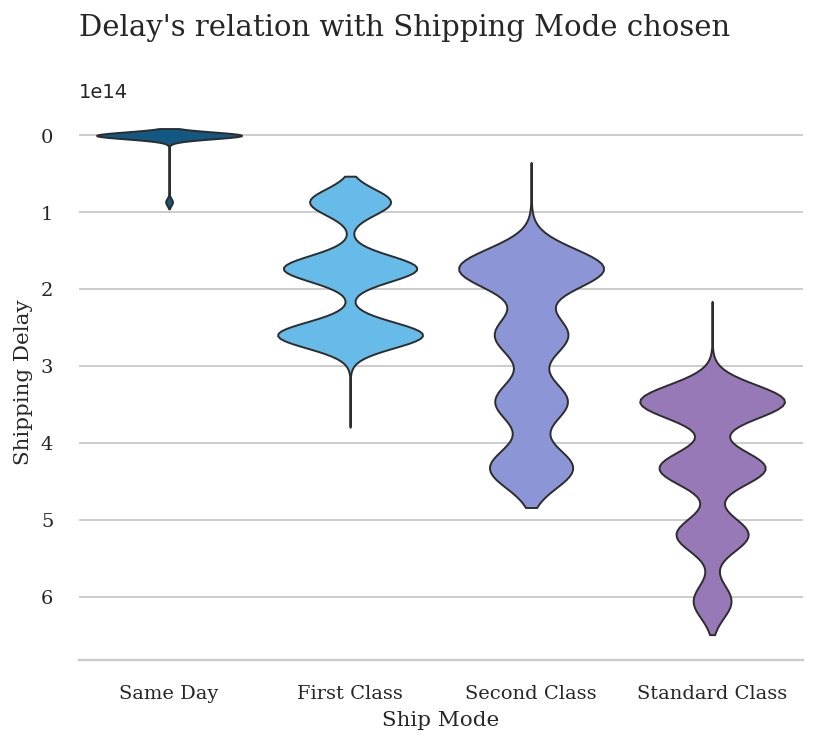

In [1219]:
colors = ['#005B96', '#51C1FF', '#808CE1', '#966EC3']
ordered= ['Same Day', 'First Class', 'Second Class', 'Standard Class']

sns.set_style("whitegrid")
sns.catplot(df, x='Ship Mode', y='Shipping Delay', kind='violin', scale='width', palette=colors, inner=None,
            linewidth=1, order=ordered, bw=0.25, aspect=1.2)
sns.despine(left=True)
plt.xlabel('Ship Mode', fontname="serif")
plt.ylabel('Shipping Delay', fontname="serif")
plt.xticks(fontname="serif")
plt.yticks(fontname="serif")

plt.title("Delay's relation with Shipping Mode chosen", y=1.1, fontsize=15, loc='left', fontname="serif")

Text(0.0, 1.0, 'The states that purchase the most expensive items')

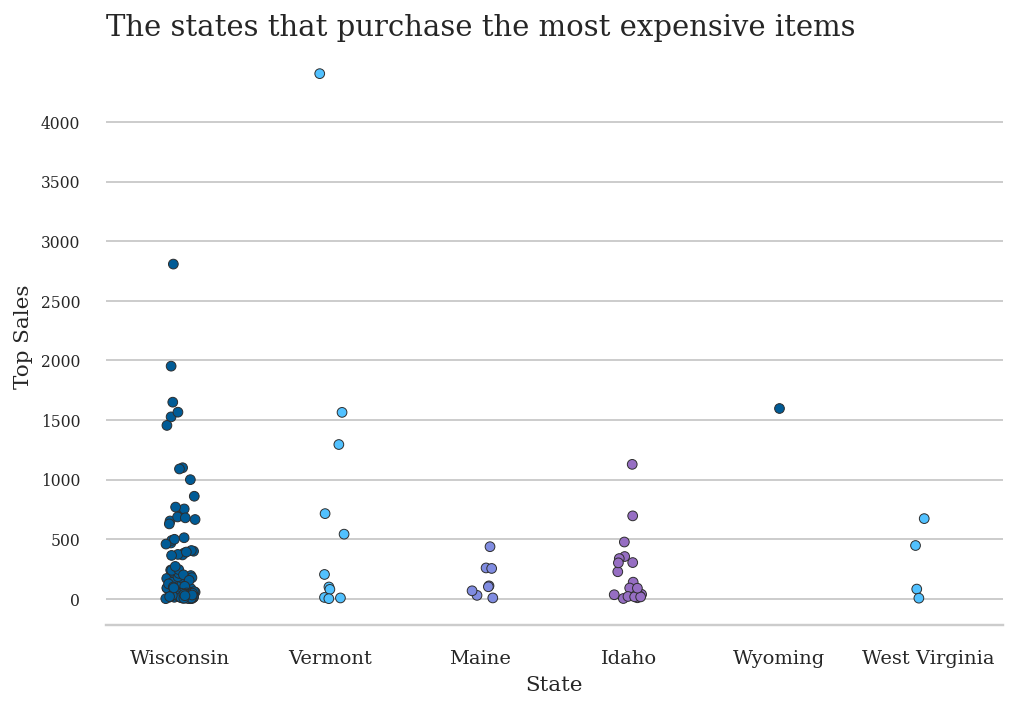

In [1220]:
top_states = df.groupby('State')['Sales'].median().sort_values(ascending=False)[:6]
top_states = df[df['State'].isin(top_states.index)][['State', 'Sales']]

sns.catplot(top_states, x='State', y='Sales', palette=colors,linewidth=0.5, kind='strip', aspect=1.5)
sns.despine(left=True)
plt.xlabel('State', fontname="serif");
plt.ylabel('Top Sales', fontname="serif");
plt.xticks(fontname="serif");
plt.yticks(np.arange(0,4500,500), fontname="serif",fontsize=8);
plt.title("The states that purchase the most expensive items", fontsize=15, loc='left', fontname="serif")

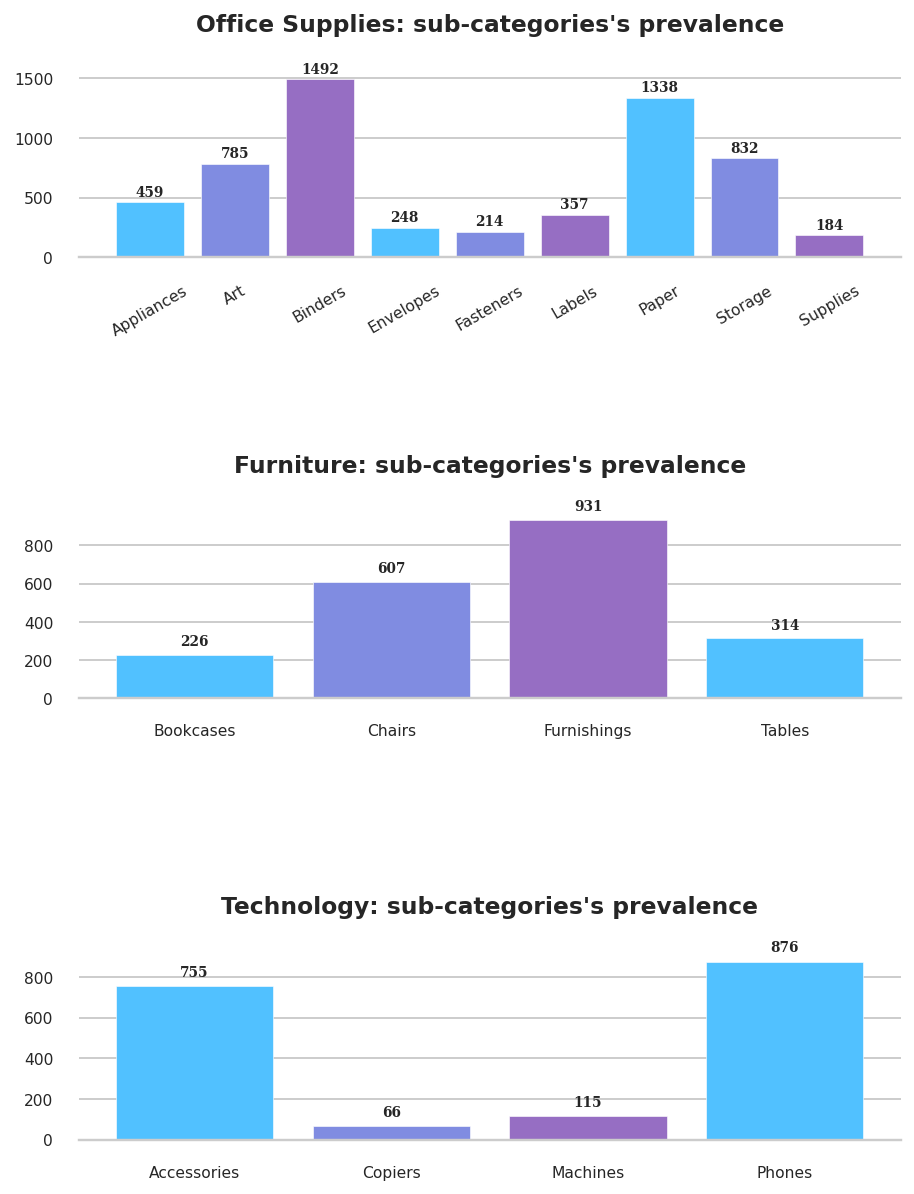

In [1221]:
sub_cat = df.groupby(['Category', 'Sub-Category'])[['Sales']].count().reset_index()

fig, ax = plt.subplots(3, 1, figsize=(8,10), constrained_layout=True)
plt.rcParams['font.family'] = 'serif'

for i, cat in enumerate(sub_cat['Category'].value_counts().index):
  ax[i].bar(sub_cat[sub_cat['Category'] == cat]['Sub-Category'], sub_cat[sub_cat['Category'] == cat]['Sales'], color=colors[1:4])
  ax[i].set_title(f'{cat}: sub-categories\'s prevalence', pad=20, fontweight='bold')

  for s in ['top', 'left', 'right']:
    ax[i].spines[s].set_visible(False)
    ax[i].xaxis.grid()
  for p in ax[i].patches:
    ax[i].text( p.get_x()+0.4, p.get_height()+50, str(p.get_height()), fontweight='bold', fontfamily='serif', fontsize=7, ha='center')
  ax[i].tick_params(axis='both', labelsize=8)

plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=30 )
plt.tight_layout(pad=5.0)

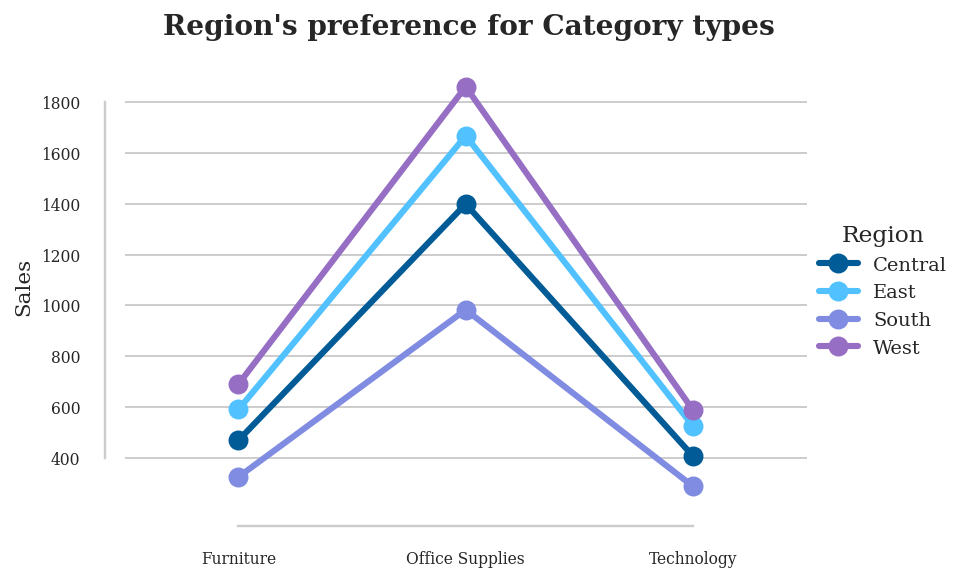

In [1222]:
reg_sells = df.groupby(['Region', 'Category'])[['Sales']].count().reset_index()
ax = sns.catplot(x=reg_sells['Category'], y=reg_sells['Sales'], hue="Region", kind="point", data=reg_sells, height=4, aspect=1.5, palette=colors)

ax.fig.suptitle('Region\'s preference for Category types', fontweight='bold', y=1.05)
ax.set(xlabel=None)
sns.despine(offset=10, trim=True);
plt.tick_params(axis='both', labelsize=8)

In [1223]:
replace_st = {
    'California': 'CA',
    'Texas': 'TX',
    'New York': 'NY',
    'Pennsylvania': 'PA',
    'Washington': 'WA',
    'Florida': 'FL'
}
cor_st = df[df['Segment'] == 'Corporate'][['Segment', 'State']].groupby('State').count().reset_index().rename(columns= {'Segment':'Count'}).sort_values(by='Count',ascending=False)
cor_st['Count'] = round(cor_st['Count']/ cor_st['Count'].sum() *100, 1)
cor_st = cor_st[:5]
for col in cor_st['State']:
  cor_st['State'][cor_st['State'] == col] = replace_st[col]
cor_st

,State,Count
3,CA,20.4
39,TX,10.5
29,NY,10.3
34,PA,6.6
43,WA,4.4


Text(0.125, 0.92, 'Most of the corporate entities of SuperStore are concentrated in California, Texas, and New York.')

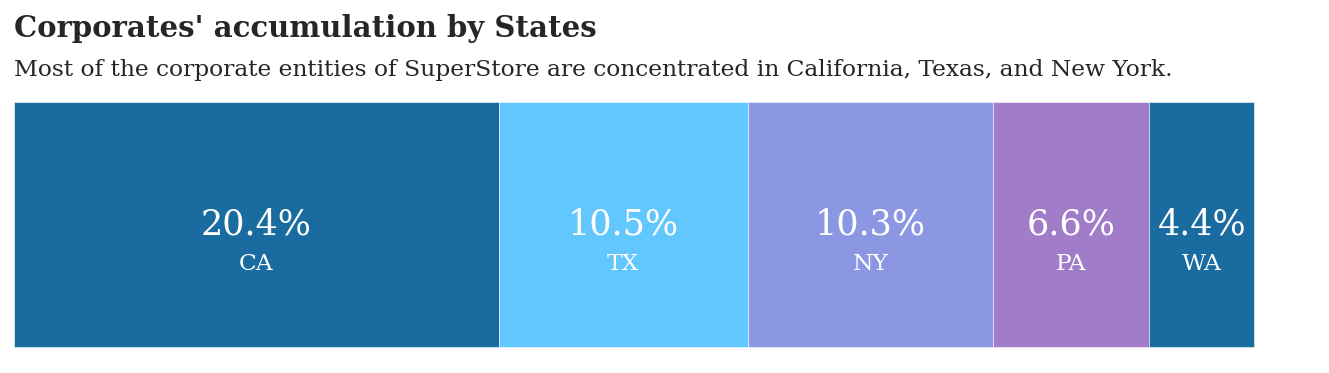

In [1224]:
fig, ax = plt.subplots(1,1,figsize=(12, 2.5))

ax.barh('State', cor_st.iloc[0]['Count'],
        color=colors[0], alpha=0.9)

ax.annotate(f"{cor_st.iloc[0]['Count']}%",
                   xy=(cor_st.iloc[0]['Count']/2, 0),
                   va = 'center', ha='center',fontsize=18, fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate(cor_st.iloc[0]['State'],
                   xy=(cor_st.iloc[0]['Count']/2, -0.15),
                   ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i, col in enumerate(cor_st['State'][1:]):
  ax.barh('State', cor_st.iloc[i+1]['Count'], left=cor_st.iloc[:i+1]['Count'].sum(), color=colors[(i+1)%4], alpha=0.9)
  ax.annotate(f"{cor_st.iloc[i+1]['Count']}%",
                   xy=(cor_st.iloc[:i+1]['Count'].sum()+cor_st.iloc[i+1]['Count']/2, 0),
                   va = 'center', ha='center',fontsize=18, fontweight='light', fontfamily='serif',
                   color='white')

  ax.annotate(cor_st.iloc[i+1]['State'],
                   xy=(cor_st.iloc[:i+1]['Count'].sum()+cor_st.iloc[i+1]['Count']/2, -0.15),
                   ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticks([]);
ax.set_yticks([]);

fig.text(0.125,1.03,'Corporates\' accumulation by States', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Most of the corporate entities of SuperStore are concentrated in California, Texas, and New York.',fontfamily='serif',fontsize=12)

In [1225]:
col_series = df['Sales'].sort_values()

Q2 = col_series.median()
mid_data = round(len(col_series)/2)
Q1, Q3 = col_series[:mid_data].median(), col_series[mid_data:].median()
IQR = Q3 - Q1
data_max, data_min = Q3 + IQR *1.5, Q1 - IQR * 1.5

cheap_prop = (df[['Segment']][df['Sales'].between(0, Q1)].value_counts(normalize=True)*100).reset_index()
exp_prop = (df[['Segment']][df['Sales'] > data_max].value_counts(normalize=True)*100).reset_index()

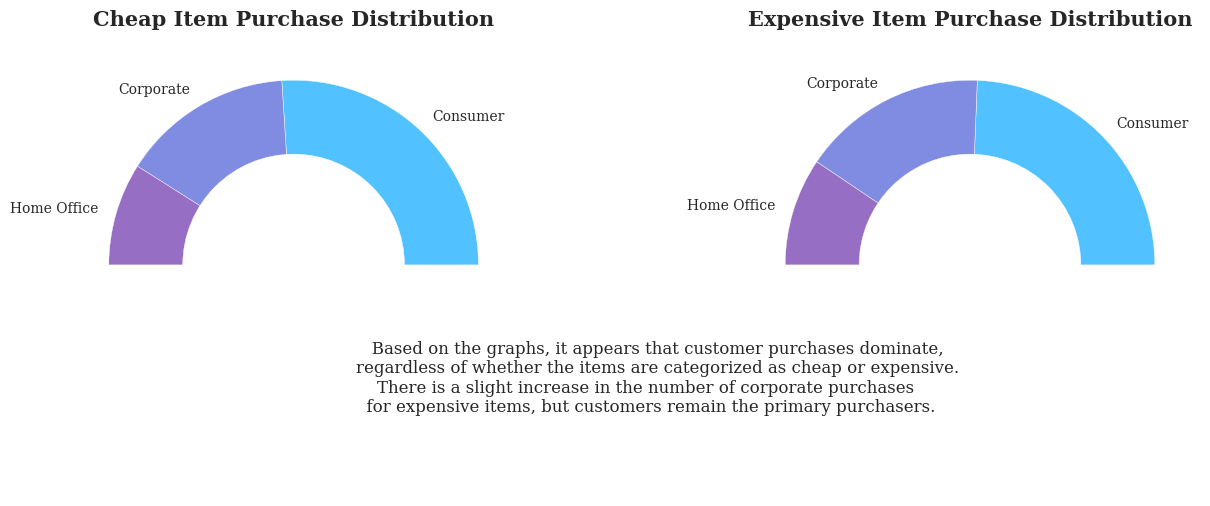

In [1226]:
plot_df = [cheap_prop, exp_prop]
titles = ['Cheap Item Purchase Distribution', 'Expensive Item Purchase Distribution']

fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

for i, dframe in enumerate(plot_df):
    dframe = dframe[:3]
    dframe.loc[len(dframe)] = ['', 100]

    # Access the correct subplot
    ax = axes[i]

    ax.pie(dframe[0], labels=dframe['Segment'], colors=colors[1:4] + ['white'])
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
    ax.set_title(titles[i], fontweight='bold', fontsize=15)

fig.text(0.34,0.25,
         '''   Based on the graphs, it appears that customer purchases dominate,
regardless of whether the items are categorized as cheap or expensive.
    There is a slight increase in the number of corporate purchases
  for expensive items, but customers remain the primary purchasers.''',
         fontfamily='serif',fontsize=12)
plt.show()
